In [ ]:
from keras.datasets import mnist

training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

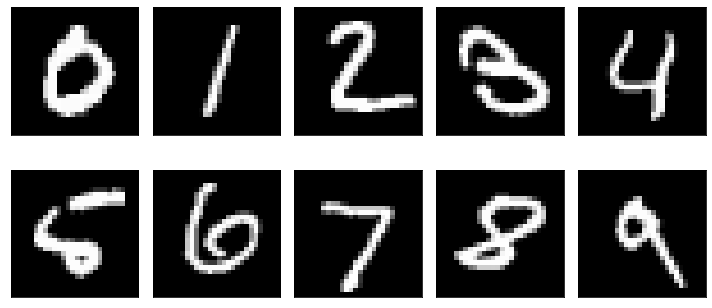

In [ ]:
from matplotlib import pyplot as plt
fig, ((ax1, ax2, ax3, ax4, ax5), 
      (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))

for idx, ax in enumerate([ax1,ax2,ax3,ax4,ax5, ax6,ax7,ax8,ax9,ax10]):
  for i in range(1000):
    if y_test[i] == idx:
      ax.imshow(X_test[i], cmap='gray')
      ax.grid(False)
      ax.set_xticks([])
      ax.set_yticks([])
      break
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def basic_autoencoder(hidden_layer_size):
  model = Sequential()
  model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
  model.add(Dense(units=784, activation='sigmoid'))
  return model

model = basic_autoencoder(32)

In [ ]:
# first dimension refers to # of samples
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [ ]:
X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# we use X_train_reshaped as both the input (x) and output (y)
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0317
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0132
Epoch 3/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0110
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0106
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0105
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0104
Epoch 7/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0103
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0103
Epoch 9/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0102
Epoch 10/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0102


In [ ]:
output = model.predict(X_test_reshaped)

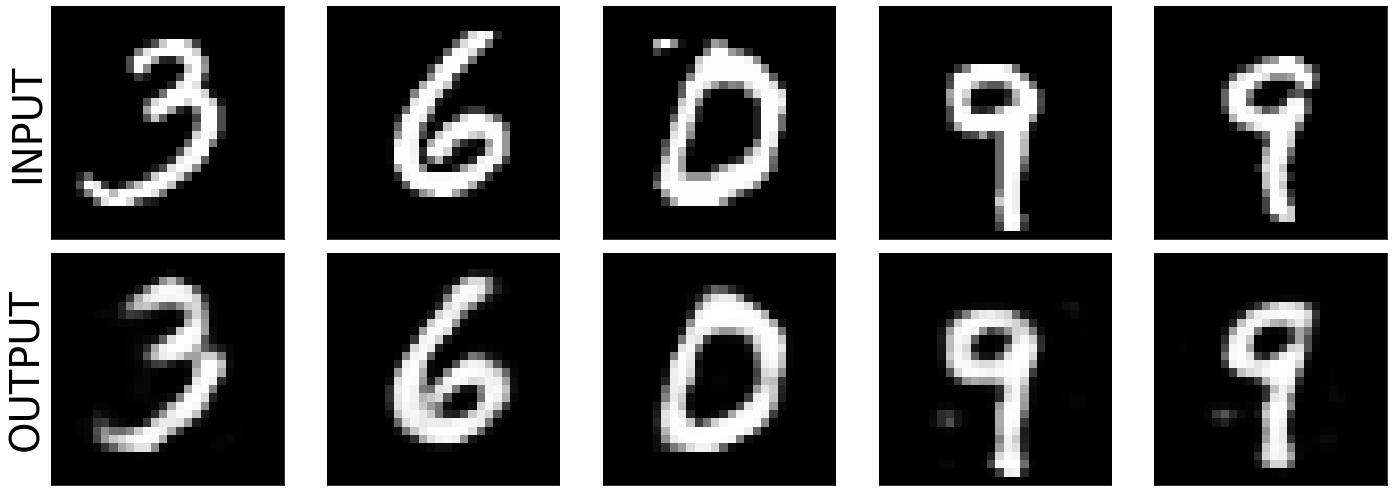

In [ ]:
import random
fig, ((ax1, ax2, ax3, ax4, ax5), 
      (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))
    
# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# plot original images (input) on top row
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
  ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
  if i == 0:
    ax.set_ylabel("INPUT",size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# plot output images from the autoencoder on the bottom row
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i == 0:
    ax.set_ylabel("OUTPUT",size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

X_train_noisy = X_train_reshaped + np.random.normal(0, 0.5,
                                                    size=X_train_reshaped.shape)
X_test_noisy = X_test_reshaped + np.random.normal(0, 0.5,
                                                  size=X_test_reshaped.shape)

In [ ]:
# clip the noisy images between 0 and 1 to normalize the images
X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

In [ ]:
denoise_autoencoder = basic_autoencoder(16)
denoise_autoencoder.compile(optimizer='adam',
                            loss='mean_squared_error')
denoise_autoencoder.fit(X_train_noisy, X_train_reshaped, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0471
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0314
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0303
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0300
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0298
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0296
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0295
Epoch 8/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0293
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0292
Epoch 10/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0291


In [ ]:
output = denoise_autoencoder.predict(X_test_noisy)

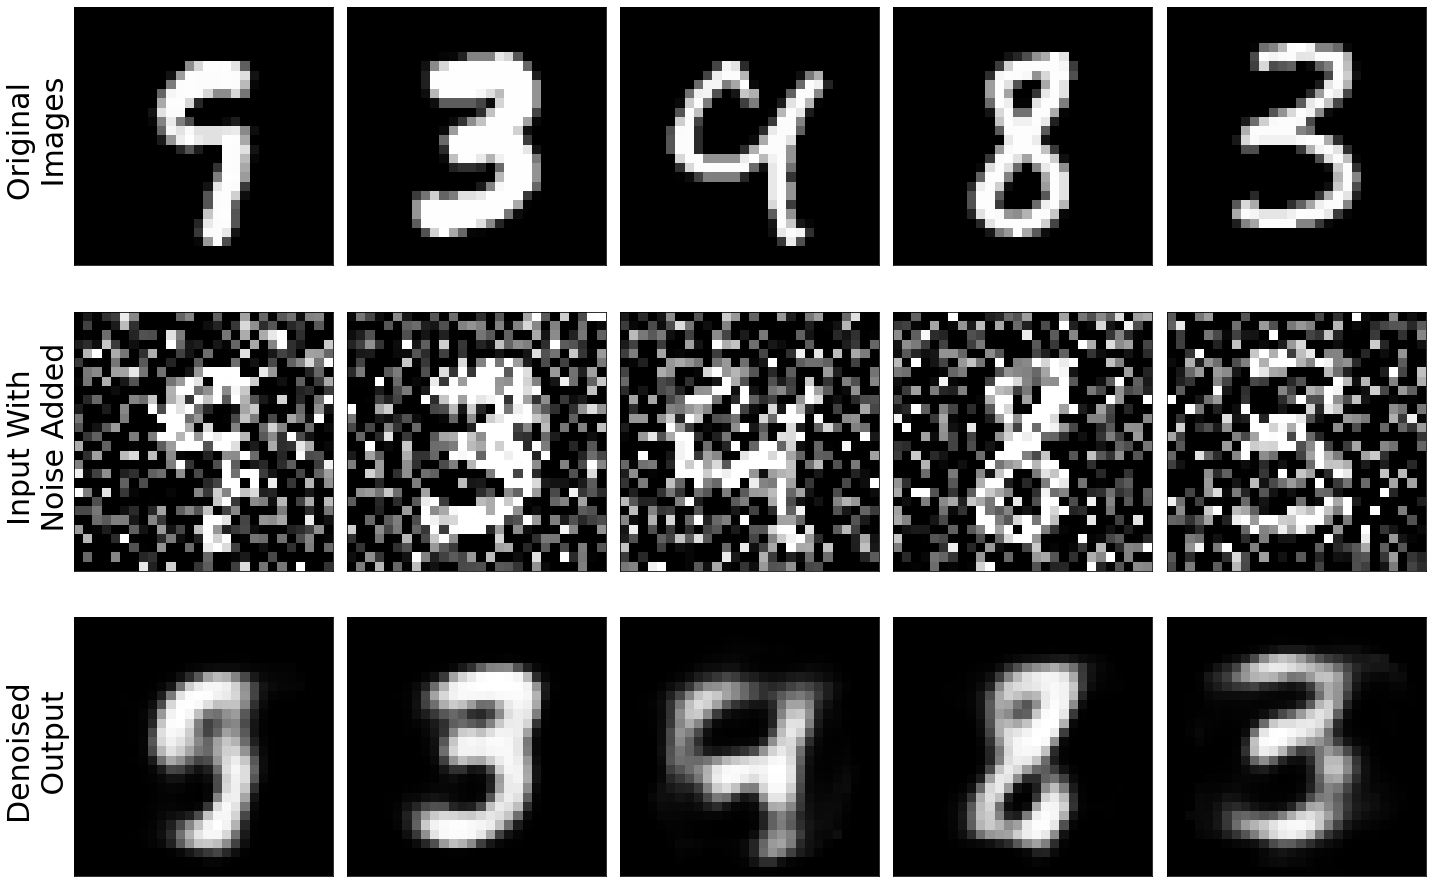

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), 
            cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
  ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28),
            cmap='gray')
  if i == 0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# 3rd row for output images from the autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), 
            cmap='gray')
  if i == 0:
    ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

# Deep Convolutional Denoising Autoencoder

In [ ]:
from keras.layers import Conv2D

conv_autoencoder = Sequential()
# encoder layers
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),
                            activation='relu', padding='same',
                            input_shape=(28,28,1)))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                            activation='relu', padding='same'))
# decoder layers (we use increasing # of filters after each layer)
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                            activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3),
                            activation='relu', padding='same'))
# output layer should be a convolutional layer with only one filter, 
# we are trying to output a 28 x 28 x 1 image
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3),
                            activation='sigmoid', padding='same'))
conv_autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(X_train_noisy.reshape(60000,28,28,1),
                     X_train_reshaped.reshape(60000,28,28,1),
                     epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.1216
Epoch 2/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1030
Epoch 3/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1013
Epoch 4/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1002
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0995
Epoch 6/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0989
Epoch 7/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0985
Epoch 8/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0983
Epoch 9/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0980
Epoch 10/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0978


In [ ]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))

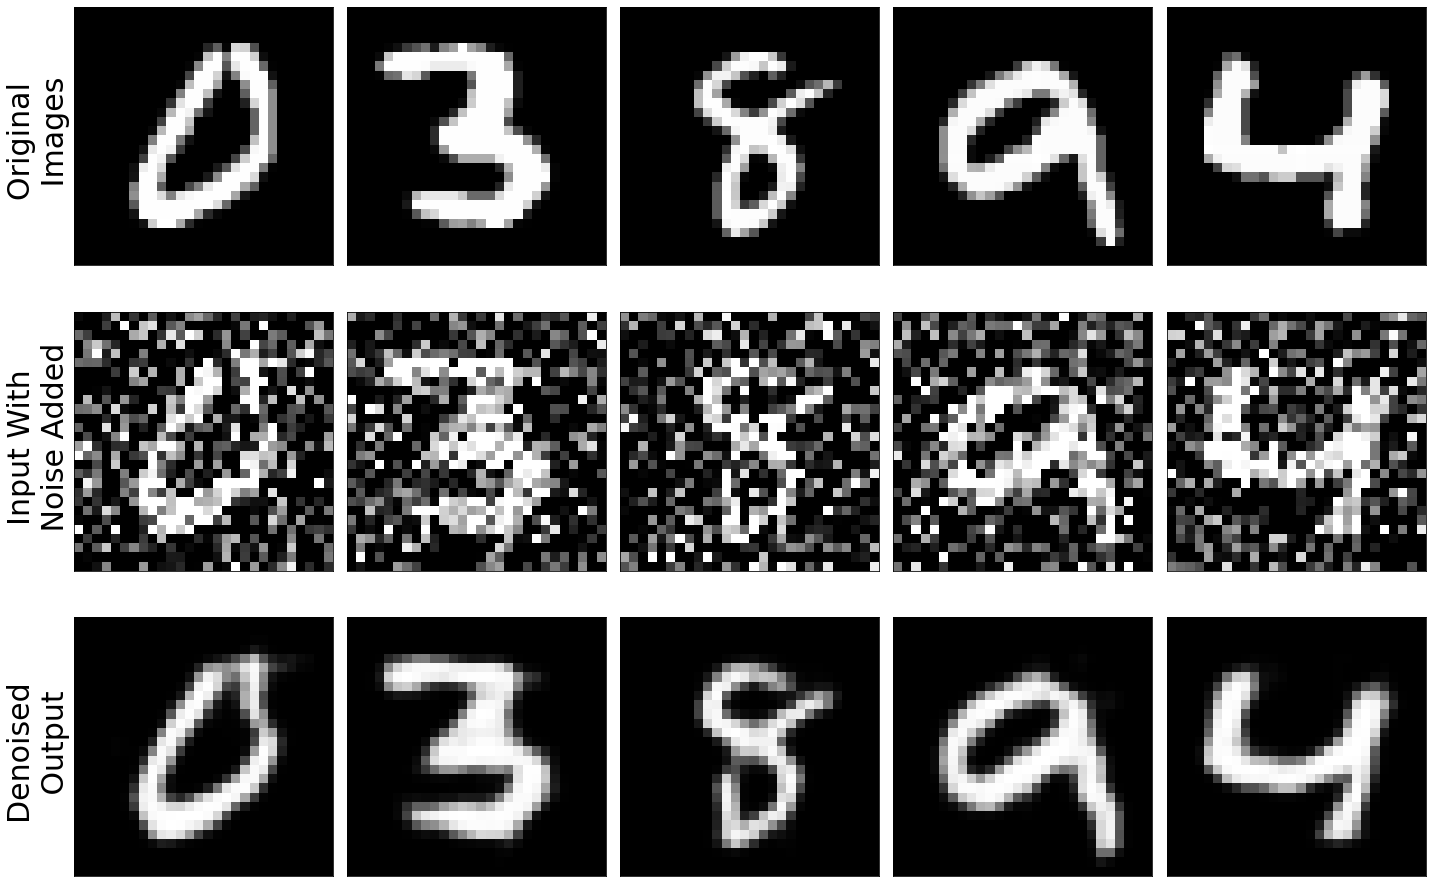

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
  ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), 
            cmap='gray')
  if i == 0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
  ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), 
            cmap='gray')
  if i == 0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

# 3rd row for output images from our autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), 
            cmap='gray')
  if i == 0:
      ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()